In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data_path= r'E:\Weather Predict\testset.csv'
df=pd.read_csv(data_path)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


Remove extra space

In [7]:
df.columns= df.columns.str.lstrip()
df.columns= df.columns.str.rstrip()
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


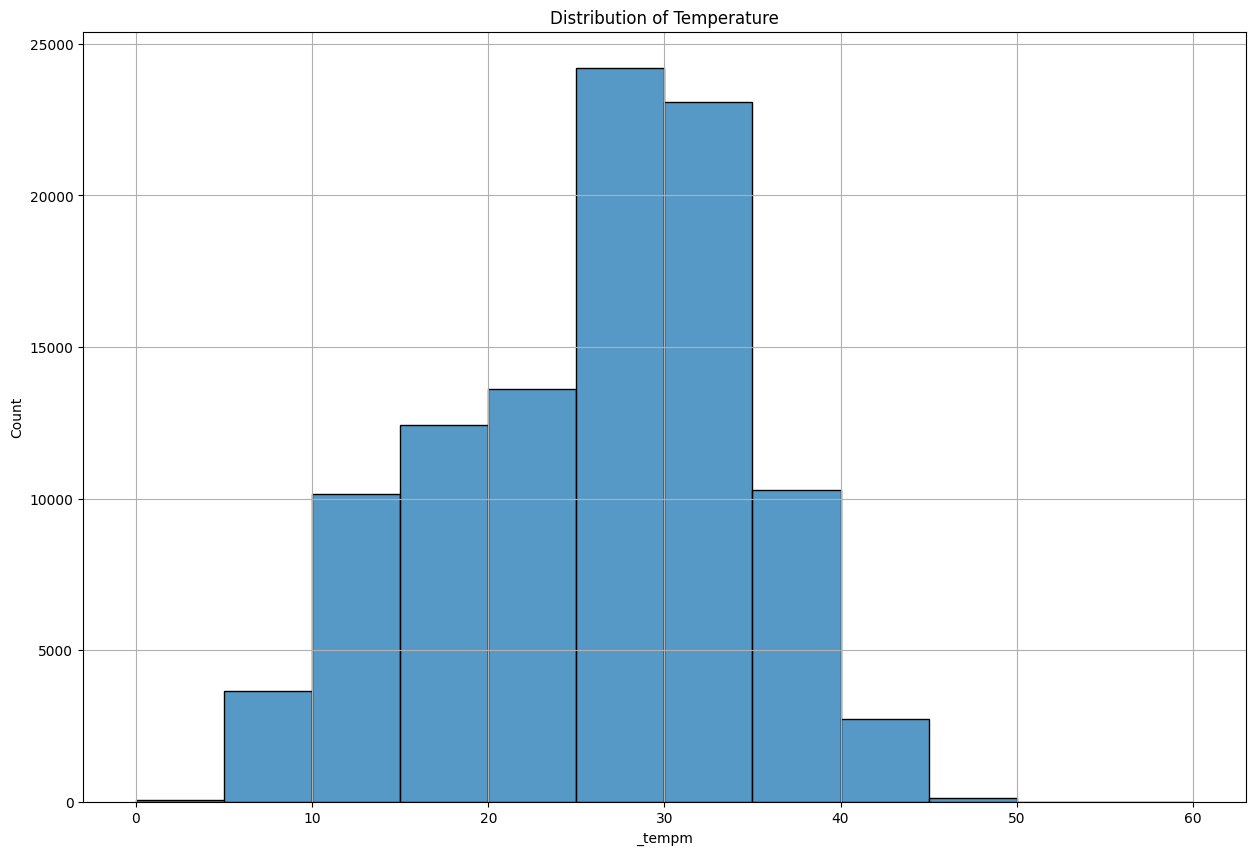

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(df._tempm,bins=[i for i in range(0,61,5)],kde=False)
plt.title("Distribution of Temperature")
plt.grid()
plt.show()

In [20]:
df.index=pd.to_datetime(df.datetime_utc	)
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [22]:
required_cols= ["_dewptm","_fog","_hail","_rain","_snow","_tempm","_thunder","_tornado"]
df=df[required_cols]
df.head()

,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,0,0,23.0,0,0


In [23]:
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [24]:
df= df.fillna(method="ffill")
df.head()

C:\Users\prith\AppData\Local\Temp\ipykernel_11592\2436218834.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method="ffill")


,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,0,0,23.0,0,0


In [25]:
df.isna().sum()

_dewptm     0
_fog        0
_hail       0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

Resample by Day.

df_final= df.resample("D").mean()

if want to resample by Month write "M", for Hour "H", For week "W"

In [26]:
df_final= df.resample("D").mean()
df_final.head()

,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01,11.666667,0.0,0.0,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,0.0,0.0,27.800000,0.0,0.0


In [27]:
df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [29]:
df_final=df_final.fillna(method="ffill")
df_final.head()

C:\Users\prith\AppData\Local\Temp\ipykernel_11592\3536653163.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final=df_final.fillna(method="ffill")


,_dewptm,_fog,_hail,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,
1996-11-01,11.666667,0.0,0.0,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,0.0,0.0,27.800000,0.0,0.0


In [30]:
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

LSTM MODEL CODE HERE

In [31]:
from sklearn.preprocessing import MinMaxScaler


ModuleNotFoundError: No module named 'sklearn'